In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 73s 46ms/step - loss: 0.5781 - accuracy: 0.7962 - val_loss: 0.8914 - val_accuracy: 0.7050
Epoch 2/50
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5463 - accuracy: 0.8048 - val_loss: 0.9272 - val_accuracy: 0.7067
Epoch 3/50
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5119 - accuracy: 0.8184 - val_loss: 0.9827 - val_accuracy: 0.7021
Epoch 4/50
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4753 - accuracy: 0.8299 - val_loss: 0.9518 - val_accuracy: 0.7082
Epoch 5/50
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4492 - accuracy: 0.8391 - val_loss: 0.9872 - val_accuracy: 0.7057
Epoch 6/50
1563/1563 [==============================] - 68s 44ms/step - loss: 0.4204 - accuracy: 0.8511 - val_loss: 1.0376 - val_accuracy: 0.7026
Epoch 7/50
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3884 - accuracy: 0.8619 - val_loss: 1.0973 -

313/313 - 6s - loss: 0.9131 - accuracy: 0.7009 - 6s/epoch - 18ms/step


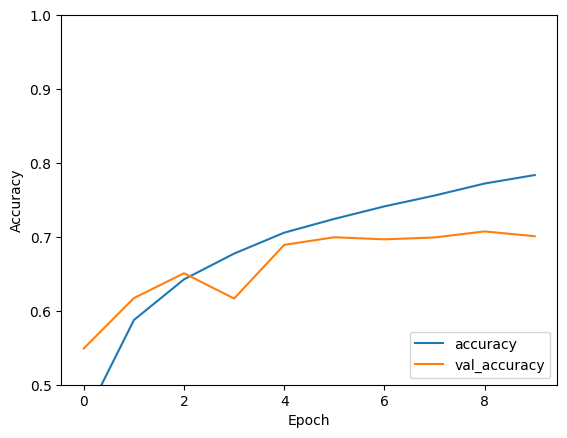

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

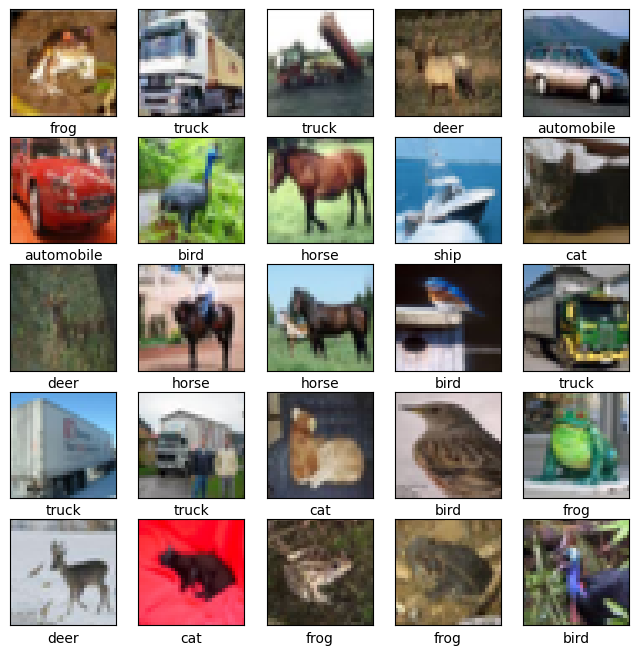

In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

313/313 [==============================] - 4s 11ms/step


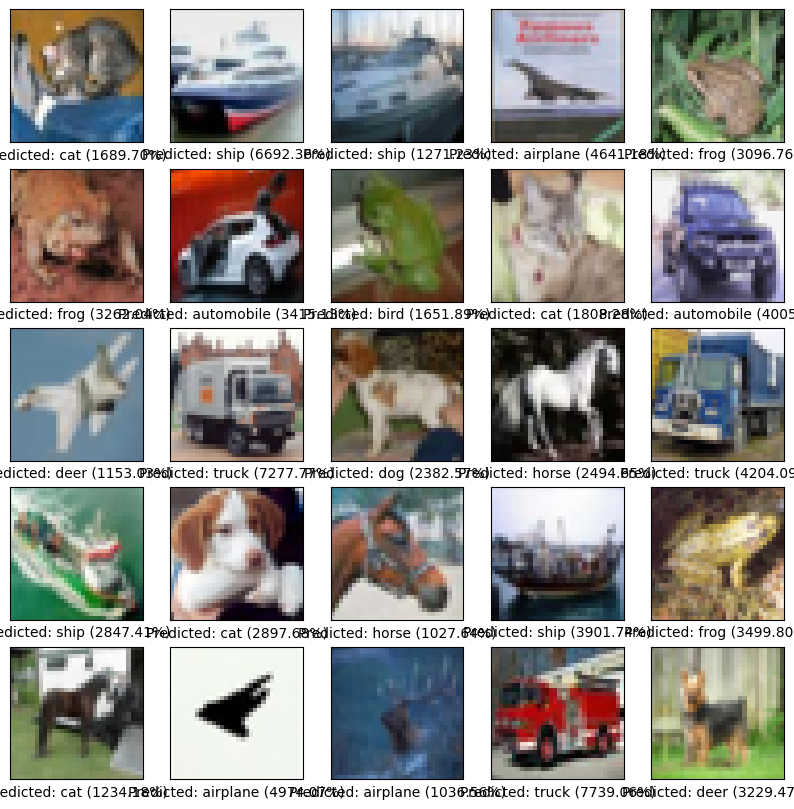

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for test images
predictions = model.predict(test_images)

# Plot a sample of test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    # Get the predicted class label
    predicted_label = np.argmax(predictions[i])

    # Display the predicted class label along with the confidence
    plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100 * np.max(predictions[i]):.2f}%)")

plt.show()